# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')
# Display the data table for preview

combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()


249

In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"]), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_df.loc[combined_df['Mouse ID'] == duplicate_mice[0]]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = combined_df.drop_duplicates(keep = 'first')
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Checking the number of mice in the clean DataFrame.
mouse_df['Mouse ID'].nunique()

249

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Tumor_vol_mean = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
Tumor_vol_median = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
Tumor_vol_var = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
Tumor_vol_stddev = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
Tumor_vol_sem = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Statistics_summary = pd.DataFrame({'Mean': Tumor_vol_mean, 'Median': Tumor_vol_median, "Variance": Tumor_vol_var, 'Std Dev': Tumor_vol_stddev, 'SEM':  Tumor_vol_sem})
Statistics_summary

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
Aggregate_summary = mouse_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
Aggregate_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

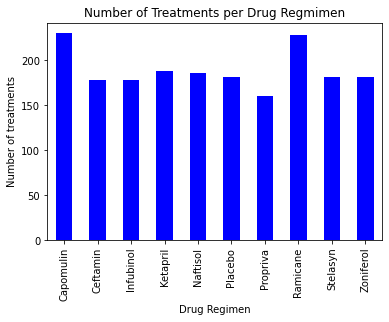

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_plot = mouse_df.groupby(['Drug Regimen'])['Timepoint'].count()
plt.title('Number of Treatments per Drug Regmimen')
plt.ylabel('Number of treatments')
drug_plot.plot(kind = 'bar', color = 'b' )

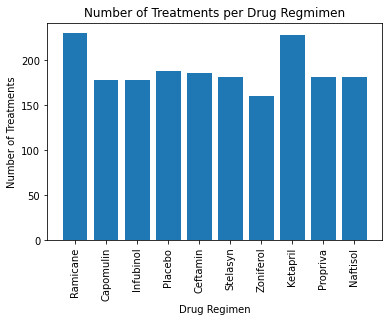

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mouse_df['Drug Regimen'].unique()
y_axis = mouse_df.groupby(['Drug Regimen'])['Timepoint'].count()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Treatments')
plt.title('Number of Treatments per Drug Regmimen')
plt.bar(x_axis, y_axis)
plt.xticks(rotation = 90)

plt.show()



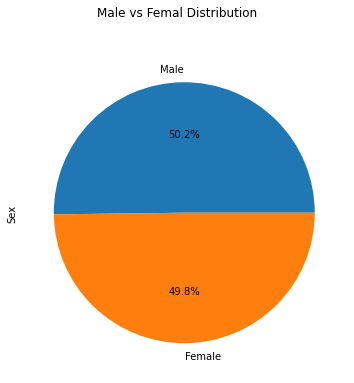

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = mouse_df.loc[:, ['Sex', 'Mouse ID']]
male_vs_female = male_vs_female.drop_duplicates()
# male_vs_female = male_vs_female.set_index('Mouse ID')
gender_count = male_vs_female['Sex'].value_counts()

gender_count.plot(kind = 'pie', subplots= 'True', figsize=(8, 6), title= 'Male vs Femal Distribution', autopct = '%1.1f%%', startangle = 0)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

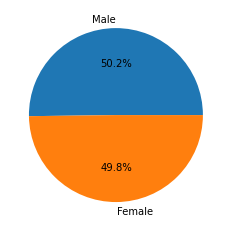

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(gender_count, labels = labels, autopct= '%1.1f%%', startangle= 0, )
plt.show

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_time = mouse_df.groupby(['Mouse ID'])['Timepoint'].max()
final_time.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_treatment = pd.merge(mouse_df, final_time, how = 'right', on = ['Mouse ID', 'Timepoint'])
final_treatment


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']



# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []
tumor_df = pd.DataFrame()


# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    
    # Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments_list:
    tumor_volume = final_treatment.loc[final_treatment['Drug Regimen'] == treatment, ['Drug Regimen','Tumor Volume (mm3)']]

    
    
    # add subset 
    
    

    tumor_volume_list.append(tumor_volume)

    # Determine outliers using upper and lower bounds

    quartile_tumor_vol = tumor_volume['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lower_quartile = quartile_tumor_vol[.25]
    upper_quartile = quartile_tumor_vol[.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    outliers= tumor_volume.loc[(tumor_volume['Tumor Volume (mm3)']< lower_bound) |(tumor_volume["Tumor Volume (mm3)"]> upper_bound) ]
    print(f"For {treatment} potential outliers are {outliers}")

    print(f'The median tumor volume is {quartile_tumor_vol[.5]} with the upper quartile at {upper_bound} and the lower quartile at {lower_bound}.')
   


For Capomulin potential outliers are Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
The median tumor volume is 38.125164399999996 with the upper quartile at 51.83201549 and the lower quartile at 20.70456164999999.
For Ramicane potential outliers are Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
The median tumor volume is 36.56165229 with the upper quartile at 54.30681135 and the lower quartile at 17.912664470000003.
For Infubinol potential outliers are    Drug Regimen  Tumor Volume (mm3)
74    Infubinol           36.321346
The median tumor volume is 60.16518046 with the upper quartile at 82.74144559000001 and the lower quartile at 36.83290494999999.
For Ceftamin potential outliers are Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
The median tumor volume is 59.85195552 with the upper quartile at 87.66645829999999 and the lower quartile at 25.355449580000002.


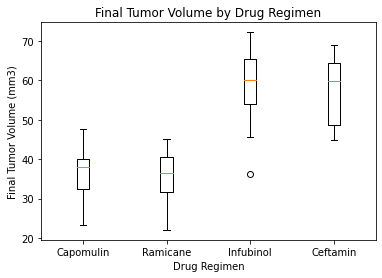

In [36]:
fig1 ,ax1 = plt.subplots()
for treatment in treatments_list:
    data = final_treatment[final_treatment['Drug Regimen']== treatment]['Tumor Volume (mm3)']
    ax1.boxplot(data, positions = [treatments_list.index(treatment) + 1], labels = [treatment])
    ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Final Tumor Volume by Drug Regimen')
plt.show()

## Line and Scatter Plots

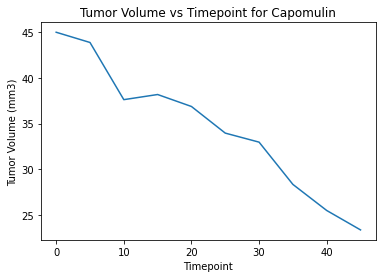

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin']
example_mouse = capomulin.loc[capomulin['Mouse ID'] == 's185']

#configure plot
plt.title('Tumor Volume vs Timepoint for Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.plot(example_mouse['Timepoint'], example_mouse['Tumor Volume (mm3)'])



In [38]:
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


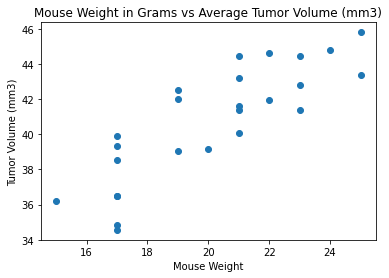

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(scatter['Weight (g)'], scatter['Tumor Volume (mm3)'])
plt.title('Mouse Weight in Grams vs Average Tumor Volume (mm3)')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and tumor size is 0.84
the r-squared is: 0.7088568047708717


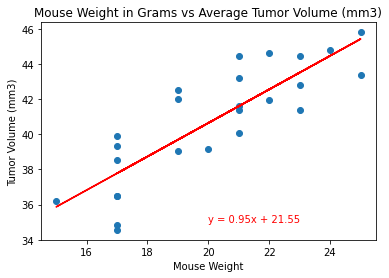

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and tumor size is {round(st.pearsonr(scatter['Weight (g)'], scatter['Tumor Volume (mm3)'])[0],2)}")


slope, intercept, rvalue, pvalue, std_err = st.linregress(scatter['Weight (g)'], scatter['Tumor Volume (mm3)'])

regress_values = slope * scatter['Weight (g)'] + intercept

line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))
scatter = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(scatter['Weight (g)'], scatter['Tumor Volume (mm3)'])
plt.title('Mouse Weight in Grams vs Average Tumor Volume (mm3)')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line_eq, (20, 35), fontsize = 10, color = 'red')
plt.plot(scatter['Weight (g)'], regress_values,'r-' )
print(f'the r-squared is: {rvalue**2}')
plt.show()
